In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
data = pd.read_excel("data.xlsx")

In [5]:
data.shape

(5100, 12)

In [6]:
data.head(5)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
2,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Business Cabin,12,6,256.50,NaN
3,BOM,DXB,869,2014-04-03,13:30:00,2014-04-03,15:30:00,Economy Cabin,177,106,82.26,NaN
4,BOM,DXB,870,2014-04-03,19:10:00,2014-04-03,21:10:00,Business Cabin,12,8,400.75,NaN


In [7]:
data.tail(10)

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
5090,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Business Cabin,20,12,164.33,NaN
5091,DXB,BOM,868,2015-06-30,16:35:00,2015-06-30,22:10:00,Economy Cabin,171,173,173.92,NaN
5092,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Business Cabin,16,13,159.04,NaN
5093,DXB,BOM,871,2015-06-30,22:15:00,2015-07-01,04:00:00,Economy Cabin,177,166,144.76,NaN
5094,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Business Cabin,16,12,179.32,NaN
5095,DXB,BOM,698,2015-07-01,12:15:00,2015-07-01,17:50:00,Economy Cabin,177,176,162.69,NaN
5096,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Business Cabin,16,15,247.11,NaN
5097,DXB,BOM,868,2015-07-01,16:35:00,2015-07-01,22:10:00,Economy Cabin,177,175,153.54,NaN
5098,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Business Cabin,16,8,152.96,NaN
5099,DXB,BOM,871,2015-07-01,22:15:00,2015-07-02,04:00:00,Economy Cabin,177,176,123.60,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 5100 non-null   object        
 1   Destination            5100 non-null   object        
 2   FlightID               5100 non-null   int64         
 3   DepartureDate          5100 non-null   datetime64[ns]
 4   DepartureTime          5100 non-null   object        
 5   ArrivalDate            5100 non-null   datetime64[ns]
 6   ArrivalTime            5100 non-null   object        
 7   Cabin                  5100 non-null   object        
 8   CabinCapacity          5100 non-null   int64         
 9   CabinBookings          5100 non-null   int64         
 10  AverageFarePerBooking  5100 non-null   float64       
 11  Forecasted Bookings    0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory u

In [9]:
data["DepartureDate"].min()

Timestamp('2014-04-03 00:00:00')

In [10]:
data["DepartureDate"].max()

Timestamp('2015-07-01 00:00:00')

In [11]:
data["Origin"].unique()

array(['BOM', 'DXB'], dtype=object)

In [12]:
data["Destination"].unique()

array(['DXB', 'BOM'], dtype=object)

In [13]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [14]:
data["FlightID"].value_counts()

871    908
870    908
869    908
868    908
698    734
697    734
Name: FlightID, dtype: int64

In [15]:
data["FlightID"].unique()

array([697, 869, 870, 698, 868, 871], dtype=int64)

In [16]:
df_697_eco = data[(data["FlightID"] == 697) & (data["Cabin"] == "Economy Cabin")]
df_697_bus = data[(data["FlightID"] == 697) & (data["Cabin"] == "Business Cabin")]

In [17]:
df_697_eco.shape

(367, 12)

In [18]:
df_697_bus.shape

(367, 12)

In [19]:
df_697_eco.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Economy Cabin,177,113,80.33,NaN
7,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Economy Cabin,183,137,86.90,NaN
13,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Economy Cabin,183,105,84.45,NaN
19,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Economy Cabin,183,91,76.69,NaN
25,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Economy Cabin,177,131,96.71,NaN


In [20]:
df_697_bus.head()

,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
0,BOM,DXB,697,2014-04-03,09:15:00,2014-04-03,11:15:00,Business Cabin,12,8,340.88,NaN
6,BOM,DXB,697,2014-04-04,09:15:00,2014-04-04,11:15:00,Business Cabin,8,7,324.57,NaN
12,BOM,DXB,697,2014-04-05,09:15:00,2014-04-05,11:15:00,Business Cabin,8,4,206.50,NaN
18,BOM,DXB,697,2014-04-06,09:15:00,2014-04-06,11:15:00,Business Cabin,8,0,10.00,NaN
24,BOM,DXB,697,2014-04-07,09:15:00,2014-04-07,11:15:00,Business Cabin,12,4,154.75,NaN


import datetime
split_date = datetime.datetime(2015,4,1)

train_ = df_697_eco[df_697_eco["DepartureDate"] < split_date]
test_ = df_697_eco[df_697_eco["DepartureDate"] >= split_date]

train_.tail(25)

train_["DepartureTime"].unique()

train_["PercentageCabinBooking"] = train_["CabinBookings"]/train_["CabinCapacity"]

train_.head()

sns.scatterplot(x="DepartureDate", y="PercentageCabinBooking", size="CabinBookings", data=train_)

ax = sns.scatterplot(x="DepartureDate", y="CabinBookings", size="CabinBookings", data=train_)
#ax.set_xlim(2014,2016)
#ax.set_xticks(range(2014,2016))
plt.show()

In [21]:
df_698_eco = data[(data["FlightID"] == 698) & (data["Cabin"] == "Economy Cabin")]
df_868_eco = data[(data["FlightID"] == 868) & (data["Cabin"] == "Economy Cabin")]
df_869_eco = data[(data["FlightID"] == 869) & (data["Cabin"] == "Economy Cabin")]
df_870_eco = data[(data["FlightID"] == 870) & (data["Cabin"] == "Economy Cabin")]
df_871_eco = data[(data["FlightID"] == 871) & (data["Cabin"] == "Economy Cabin")]

In [22]:
df_698_bus = data[(data["FlightID"] == 698) & (data["Cabin"] == "Business Cabin")]
df_868_bus = data[(data["FlightID"] == 868) & (data["Cabin"] == "Business Cabin")]
df_869_bus = data[(data["FlightID"] == 869) & (data["Cabin"] == "Business Cabin")]
df_870_bus = data[(data["FlightID"] == 870) & (data["Cabin"] == "Business Cabin")]
df_871_bus = data[(data["FlightID"] == 871) & (data["Cabin"] == "Business Cabin")]

In [23]:
df_697_eco = df_697_eco.sort_values('DepartureDate')
df_697_eco = df_697_eco.set_index('DepartureDate')
df_697_eco.index

DatetimeIndex(['2014-04-03', '2014-04-04', '2014-04-05', '2014-04-06',
               '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10',
               '2014-04-11', '2014-04-12',
               ...
               '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25',
               '2015-06-26', '2015-06-27', '2015-06-28', '2015-06-29',
               '2015-06-30', '2015-07-01'],
              dtype='datetime64[ns]', name='DepartureDate', length=367, freq=None)

In [24]:
y = df_697_eco['CabinBookings'].resample('MS').mean()

y['2014':]

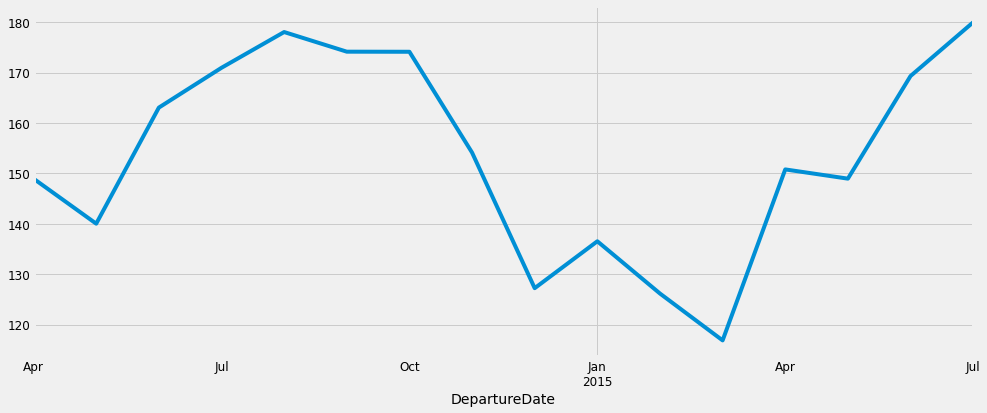

In [25]:
y.plot(figsize=(15, 6))
plt.show()

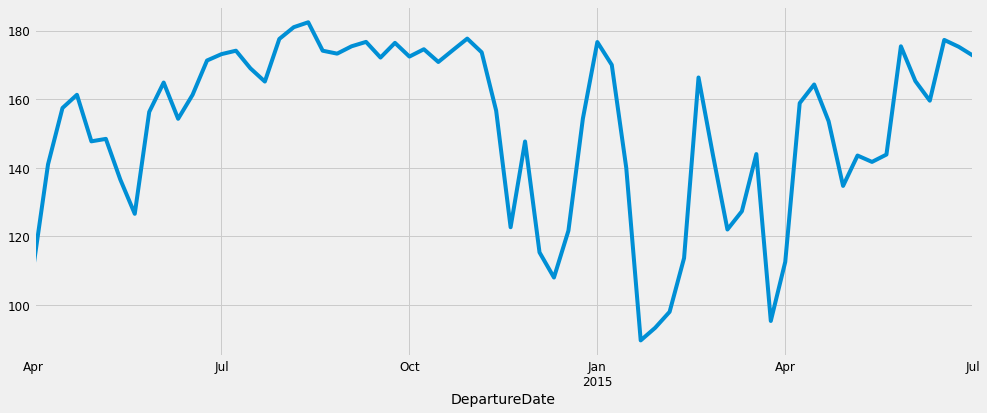

In [26]:
y = df_697_eco['CabinBookings'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

y['2014':]

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [29]:
df_697_eco = data[(data["FlightID"] == 697) & (data["Cabin"] == "Economy Cabin")]
df_697_bus = data[(data["FlightID"] == 697) & (data["Cabin"] == "Business Cabin")]

In [31]:
split_date = datetime.datetime(2015,4,1)
train = df_697_eco[df_697_eco["DepartureDate"] < split_date]
test = df_697_eco[df_697_eco["DepartureDate"] >= split_date]

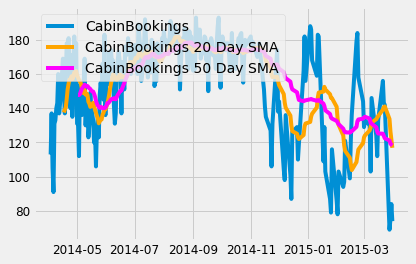

In [32]:
rolling_mean = train.CabinBookings.rolling(window=15).mean()
rolling_mean2 = train.CabinBookings.rolling(window=30).mean()
plt.plot(train.DepartureDate, train.CabinBookings, label='CabinBookings')
plt.plot(train.DepartureDate, rolling_mean, label='CabinBookings 20 Day SMA', color='orange')
plt.plot(train.DepartureDate, rolling_mean2, label='CabinBookings 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [41]:
rolling_mean.tail()

2521    170.0
2527    170.9
2533    171.1
2539    172.5
2545    173.8
Name: CabinBookings, dtype: float64

In [59]:
#from sklearn import preprocessing
def create_features(df, label=None):
    """
    Creates features from datetime index.
    """
    df = df.copy()
    #df['date'] = df.index
    df['depmonth'] = df['DepartureDate'].dt.month
    df['depday'] = df['DepartureDate'].dt.day
    df['depdayofweek'] = df['DepartureDate'].dt.dayofweek
    df['depquarter'] = df['DepartureDate'].dt.quarter
    df['depweekofyear'] = df['DepartureDate'].dt.weekofyear
    
    df['arrmonth'] = df['ArrivalDate'].dt.month
    df['arrday'] = df['ArrivalDate'].dt.day
    df['arrdayofweek'] = df['ArrivalDate'].dt.dayofweek
    df['arrquarter'] = df['ArrivalDate'].dt.quarter
    df['arrweekofyear'] = df['ArrivalDate'].dt.weekofyear
    #df['arryear'] = df['ArrivalDate'].dt.year
    #df['arrdayofyear'] = df['ArrivalDate'].dt.dayofyear
    
    
    df['dephour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%f').dt.hour
    df['arrhour'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M:%f').dt.hour
    
    """
    le = preprocessing.LabelEncoder()
    le.fit(df['Cabin'])
    print(le.classes_)
    df['Cabin'] = le.transform(df['Cabin'])
    """
    #df['Cabin_new'] = df['Cabin'].apply(lambda x: 1 if x=="Business Cabin" else 0)
    
    X = df[['DepartureDate', 'depmonth','depday','depdayofweek','depquarter','depweekofyear',
           'ArrivalDate', 'arrmonth','arrday','arrdayofweek', 'arrquarter','arrweekofyear',
           'dephour', 'arrhour', 'CabinCapacity', 'CabinBookings']]
    if label:
        y = df[label]
        return X, y
    return X

In [60]:
df_new = create_features(df_697_eco)

In [35]:
df_new.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [25]:
split_date = datetime.datetime(2015,4,1)

In [26]:
train = df_new[df_new["DepartureDate"] < split_date]
test = df_new[df_new["DepartureDate"] >= split_date]

In [27]:
df_new.shape

(367, 15)

In [28]:
train.shape

(275, 15)

In [29]:
test.shape

(92, 15)

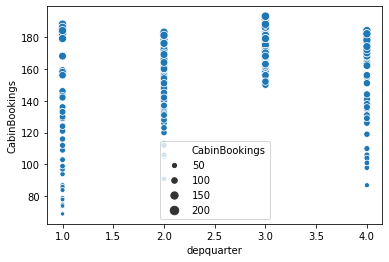

In [31]:
sns.scatterplot(x="depquarter", y="CabinBookings", size="CabinBookings", data=train)

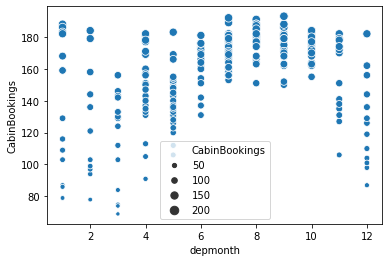

In [32]:
sns.scatterplot(x="depmonth", y="CabinBookings", size="CabinBookings", data=train)

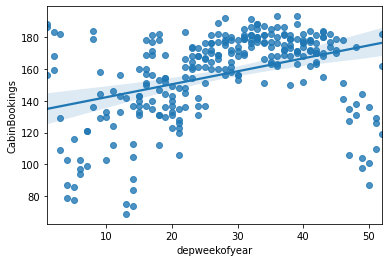

In [33]:
sns.regplot(x="depweekofyear", y="CabinBookings",data=train)

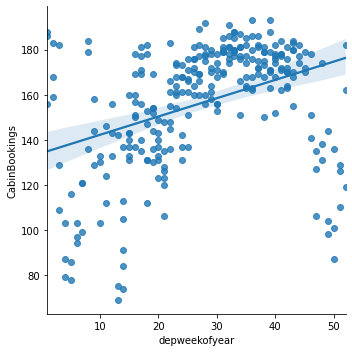

In [34]:
sns.lmplot(x="depweekofyear", y="CabinBookings",data=train)

In [35]:
train.head()

,DepartureDate,depmonth,depday,depdayofweek,depquarter,depweekofyear,ArrivalDate,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
1,2014-04-03,4,3,3,2,14,2014-04-03,4,3,3,2,14,9,11,113
7,2014-04-04,4,4,4,2,14,2014-04-04,4,4,4,2,14,9,11,137
13,2014-04-05,4,5,5,2,14,2014-04-05,4,5,5,2,14,9,11,105
19,2014-04-06,4,6,6,2,14,2014-04-06,4,6,6,2,14,9,11,91
25,2014-04-07,4,7,0,2,15,2014-04-07,4,7,0,2,15,9,11,131


In [36]:
train.corr()

,depmonth,depday,depdayofweek,depquarter,depweekofyear,arrmonth,arrday,arrdayofweek,arrquarter,arrweekofyear,dephour,arrhour,CabinBookings
depmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
depday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
depdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
depquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
depweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873
arrmonth,1.000000,-0.029656,-0.021544,0.959717,0.967160,1.000000,-0.029656,-0.021544,0.959717,0.967160,NaN,NaN,0.384161
arrday,-0.029656,1.000000,0.010168,-0.033962,0.045649,-0.029656,1.000000,0.010168,-0.033962,0.045649,NaN,NaN,-0.024955
arrdayofweek,-0.021544,0.010168,1.000000,-0.021035,-0.022788,-0.021544,0.010168,1.000000,-0.021035,-0.022788,NaN,NaN,-0.052608
arrquarter,0.959717,-0.033962,-0.021035,1.000000,0.931395,0.959717,-0.033962,-0.021035,1.000000,0.931395,NaN,NaN,0.420157
arrweekofyear,0.967160,0.045649,-0.022788,0.931395,1.000000,0.967160,0.045649,-0.022788,0.931395,1.000000,NaN,NaN,0.380873


In [61]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def build_models(df):
    
    train = df[df["DepartureDate"] < split_date]
    test = df[df["DepartureDate"] >= split_date]
    
    df_train = create_features(train)
    df_test = create_features(test)
    
    cols_to_drop = ["CabinBookings", "DepartureDate", "ArrivalDate", \
                                  "arrday", "arrdayofweek", "arrmonth", "arrquarter", "arrweekofyear", \
                                 "dephour", "arrhour"]

    y_train = df_train["CabinBookings"]
    X_train = df_train.drop(columns=cols_to_drop, axis=1)

    y_test = df_test["CabinBookings"]
    X_test = df_test.drop(columns=cols_to_drop, axis=1)
    print(X_train.columns)
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Linear Regression: ",mean_absolute_error(y_test, y_pred))

    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Decision Tree Regressor: ",mean_absolute_error(y_test, y_pred))

    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("mean_absolute_error of Random Forest Regressor: ",mean_absolute_error(y_test, y_pred))
    
    df_ = pd.DataFrame({"Actual Bookings" : y_test, "Predicted Bookings": y_pred})
    #print(df_)
    
    test["Forecasted Bookings"] = y_pred
    return test

In [62]:
res = build_models(df_697_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  18.799077091547826
mean_absolute_error of Decision Tree Regressor:  19.717391304347824
mean_absolute_error of Random Forest Regressor:  16.266413043478263


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


In [63]:
res = build_models(df_697_bus)
res.head(20)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.1282141535970887
mean_absolute_error of Decision Tree Regressor:  2.7282608695652173
mean_absolute_error of Random Forest Regressor:  2.2247826086956524


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
1998,BOM,DXB,697,2015-04-01,09:15:00,2015-04-01,11:15:00,Business Cabin,16,7,124.44,7.20
2004,BOM,DXB,697,2015-04-02,09:15:00,2015-04-02,11:15:00,Business Cabin,8,0,26.67,5.29
2010,BOM,DXB,697,2015-04-03,09:15:00,2015-04-03,11:15:00,Business Cabin,12,6,92.34,5.74
2016,BOM,DXB,697,2015-04-04,09:15:00,2015-04-04,11:15:00,Business Cabin,12,5,232.27,5.92
2022,BOM,DXB,697,2015-04-05,09:15:00,2015-04-05,11:15:00,Business Cabin,12,4,26.67,6.35
2028,BOM,DXB,697,2015-04-06,09:15:00,2015-04-06,11:15:00,Business Cabin,12,5,68.80,5.26
2034,BOM,DXB,697,2015-04-07,09:15:00,2015-04-07,11:15:00,Business Cabin,12,9,204.82,6.07
2040,BOM,DXB,697,2015-04-08,09:15:00,2015-04-08,11:15:00,Business Cabin,16,15,193.51,7.16
2046,BOM,DXB,697,2015-04-09,09:15:00,2015-04-09,11:15:00,Business Cabin,12,9,117.48,7.79
2052,BOM,DXB,697,2015-04-10,09:15:00,2015-04-10,11:15:00,Business Cabin,12,8,177.96,7.87


In [64]:
build_models(df_698_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  18.396952406263
mean_absolute_error of Decision Tree Regressor:  17.75
mean_absolute_error of Random Forest Regressor:  17.483260869565214


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4549,DXB,BOM,698,2015-04-01,12:15:00,2015-04-01,17:50:00,Economy Cabin,177,168,228.20,173.85
4555,DXB,BOM,698,2015-04-02,12:15:00,2015-04-02,17:50:00,Economy Cabin,165,162,301.81,168.61
4561,DXB,BOM,698,2015-04-03,12:15:00,2015-04-03,17:50:00,Economy Cabin,177,181,317.86,173.46
4567,DXB,BOM,698,2015-04-04,12:15:00,2015-04-04,17:50:00,Economy Cabin,177,143,226.46,175.76
4573,DXB,BOM,698,2015-04-05,12:15:00,2015-04-05,17:50:00,Economy Cabin,177,137,159.57,176.59
4579,DXB,BOM,698,2015-04-06,12:15:00,2015-04-06,17:50:00,Economy Cabin,177,156,152.65,176.41
4585,DXB,BOM,698,2015-04-07,12:15:00,2015-04-07,17:50:00,Economy Cabin,177,145,151.06,177.06
4591,DXB,BOM,698,2015-04-08,12:15:00,2015-04-08,17:50:00,Economy Cabin,177,124,145.53,178.84
4597,DXB,BOM,698,2015-04-09,12:15:00,2015-04-09,17:50:00,Economy Cabin,177,135,136.26,179.27
4603,DXB,BOM,698,2015-04-10,12:15:00,2015-04-10,17:50:00,Economy Cabin,144,136,141.72,146.04


In [69]:
build_models(df_698_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  3.552149433447686
mean_absolute_error of Decision Tree Regressor:  4.0978260869565215
mean_absolute_error of Random Forest Regressor:  3.6339130434782607


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4548,DXB,BOM,698,2015-04-01,12:15:00,2015-04-01,17:50:00,Business Cabin,16,9,184.02,15.15
4554,DXB,BOM,698,2015-04-02,12:15:00,2015-04-02,17:50:00,Business Cabin,24,20,366.48,17.30
4560,DXB,BOM,698,2015-04-03,12:15:00,2015-04-03,17:50:00,Business Cabin,16,10,270.74,15.40
4566,DXB,BOM,698,2015-04-04,12:15:00,2015-04-04,17:50:00,Business Cabin,16,7,201.39,14.74
4572,DXB,BOM,698,2015-04-05,12:15:00,2015-04-05,17:50:00,Business Cabin,16,3,128.14,14.64
4578,DXB,BOM,698,2015-04-06,12:15:00,2015-04-06,17:50:00,Business Cabin,16,6,229.62,14.37
4584,DXB,BOM,698,2015-04-07,12:15:00,2015-04-07,17:50:00,Business Cabin,16,4,26.67,14.35
4590,DXB,BOM,698,2015-04-08,12:15:00,2015-04-08,17:50:00,Business Cabin,16,9,261.37,15.23
4596,DXB,BOM,698,2015-04-09,12:15:00,2015-04-09,17:50:00,Business Cabin,16,7,156.00,15.31
4602,DXB,BOM,698,2015-04-10,12:15:00,2015-04-10,17:50:00,Business Cabin,16,3,127.92,15.36


In [65]:
build_models(df_868_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  19.647237544879143
mean_absolute_error of Decision Tree Regressor:  16.347826086956523
mean_absolute_error of Random Forest Regressor:  14.002717391304348


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4551,DXB,BOM,868,2015-04-01,16:35:00,2015-04-01,22:10:00,Economy Cabin,177,170,254.06,171.92
4557,DXB,BOM,868,2015-04-02,16:35:00,2015-04-02,22:10:00,Economy Cabin,159,153,327.36,154.34
4563,DXB,BOM,868,2015-04-03,16:35:00,2015-04-03,22:10:00,Economy Cabin,150,143,290.37,141.97
4569,DXB,BOM,868,2015-04-04,16:35:00,2015-04-04,22:10:00,Economy Cabin,171,155,185.42,169.67
4575,DXB,BOM,868,2015-04-05,16:35:00,2015-04-05,22:10:00,Economy Cabin,177,166,145.41,173.03
4581,DXB,BOM,868,2015-04-06,16:35:00,2015-04-06,22:10:00,Economy Cabin,177,143,133.89,171.55
4587,DXB,BOM,868,2015-04-07,16:35:00,2015-04-07,22:10:00,Economy Cabin,177,143,137.29,173.81
4593,DXB,BOM,868,2015-04-08,16:35:00,2015-04-08,22:10:00,Economy Cabin,177,133,127.35,171.76
4599,DXB,BOM,868,2015-04-09,16:35:00,2015-04-09,22:10:00,Economy Cabin,144,107,124.73,144.30
4605,DXB,BOM,868,2015-04-10,16:35:00,2015-04-10,22:10:00,Economy Cabin,177,104,126.89,173.29


In [70]:
build_models(df_868_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.971622882596528
mean_absolute_error of Decision Tree Regressor:  3.847826086956522
mean_absolute_error of Random Forest Regressor:  3.0823913043478255


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4550,DXB,BOM,868,2015-04-01,16:35:00,2015-04-01,22:10:00,Business Cabin,16,16,264.47,14.18
4556,DXB,BOM,868,2015-04-02,16:35:00,2015-04-02,22:10:00,Business Cabin,28,22,384.11,16.57
4562,DXB,BOM,868,2015-04-03,16:35:00,2015-04-03,22:10:00,Business Cabin,16,10,209.72,14.24
4568,DXB,BOM,868,2015-04-04,16:35:00,2015-04-04,22:10:00,Business Cabin,20,9,264.48,14.20
4574,DXB,BOM,868,2015-04-05,16:35:00,2015-04-05,22:10:00,Business Cabin,16,5,331.09,14.17
4580,DXB,BOM,868,2015-04-06,16:35:00,2015-04-06,22:10:00,Business Cabin,16,4,178.88,11.73
4586,DXB,BOM,868,2015-04-07,16:35:00,2015-04-07,22:10:00,Business Cabin,16,7,244.11,13.24
4592,DXB,BOM,868,2015-04-08,16:35:00,2015-04-08,22:10:00,Business Cabin,16,6,316.58,14.01
4598,DXB,BOM,868,2015-04-09,16:35:00,2015-04-09,22:10:00,Business Cabin,20,11,218.70,17.21
4604,DXB,BOM,868,2015-04-10,16:35:00,2015-04-10,22:10:00,Business Cabin,16,6,279.80,14.73


In [66]:
build_models(df_869_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  26.751543469643654
mean_absolute_error of Decision Tree Regressor:  20.608695652173914
mean_absolute_error of Random Forest Regressor:  19.30652173913043


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2001,BOM,DXB,869,2015-04-01,13:30:00,2015-04-01,15:30:00,Economy Cabin,171,70,91.28,123.08
2007,BOM,DXB,869,2015-04-02,13:30:00,2015-04-02,15:30:00,Economy Cabin,195,99,104.33,105.50
2013,BOM,DXB,869,2015-04-03,13:30:00,2015-04-03,15:30:00,Economy Cabin,162,101,103.28,116.42
2019,BOM,DXB,869,2015-04-04,13:30:00,2015-04-04,15:30:00,Economy Cabin,183,112,104.03,85.83
2025,BOM,DXB,869,2015-04-05,13:30:00,2015-04-05,15:30:00,Economy Cabin,177,110,116.56,101.52
2031,BOM,DXB,869,2015-04-06,13:30:00,2015-04-06,15:30:00,Economy Cabin,183,182,151.43,117.91
2037,BOM,DXB,869,2015-04-07,13:30:00,2015-04-07,15:30:00,Economy Cabin,171,167,129.50,123.99
2043,BOM,DXB,869,2015-04-08,13:30:00,2015-04-08,15:30:00,Economy Cabin,183,137,116.00,121.43
2049,BOM,DXB,869,2015-04-09,13:30:00,2015-04-09,15:30:00,Economy Cabin,150,143,128.59,129.44
2055,BOM,DXB,869,2015-04-10,13:30:00,2015-04-10,15:30:00,Economy Cabin,177,125,153.99,136.86


In [71]:
build_models(df_869_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.1032742095831325
mean_absolute_error of Decision Tree Regressor:  3.2065217391304346
mean_absolute_error of Random Forest Regressor:  2.283478260869565


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2000,BOM,DXB,869,2015-04-01,13:30:00,2015-04-01,15:30:00,Business Cabin,20,6,96.89,11.85
2006,BOM,DXB,869,2015-04-02,13:30:00,2015-04-02,15:30:00,Business Cabin,4,1,307.00,6.18
2012,BOM,DXB,869,2015-04-03,13:30:00,2015-04-03,15:30:00,Business Cabin,8,4,220.25,5.87
2018,BOM,DXB,869,2015-04-04,13:30:00,2015-04-04,15:30:00,Business Cabin,12,5,55.34,6.12
2024,BOM,DXB,869,2015-04-05,13:30:00,2015-04-05,15:30:00,Business Cabin,16,9,248.59,5.03
2030,BOM,DXB,869,2015-04-06,13:30:00,2015-04-06,15:30:00,Business Cabin,12,12,228.39,7.81
2036,BOM,DXB,869,2015-04-07,13:30:00,2015-04-07,15:30:00,Business Cabin,20,14,162.79,11.37
2042,BOM,DXB,869,2015-04-08,13:30:00,2015-04-08,15:30:00,Business Cabin,12,9,97.00,9.51
2048,BOM,DXB,869,2015-04-09,13:30:00,2015-04-09,15:30:00,Business Cabin,16,10,132.40,6.36
2054,BOM,DXB,869,2015-04-10,13:30:00,2015-04-10,15:30:00,Business Cabin,16,10,146.73,7.18


In [67]:
build_models(df_870_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  30.973817219016095
mean_absolute_error of Decision Tree Regressor:  24.043478260869566
mean_absolute_error of Random Forest Regressor:  23.64967391304348


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2003,BOM,DXB,870,2015-04-01,19:10:00,2015-04-01,21:10:00,Economy Cabin,183,75,71.10,110.52
2009,BOM,DXB,870,2015-04-02,19:10:00,2015-04-02,21:10:00,Economy Cabin,183,114,87.26,115.60
2015,BOM,DXB,870,2015-04-03,19:10:00,2015-04-03,21:10:00,Economy Cabin,156,71,87.35,115.17
2021,BOM,DXB,870,2015-04-04,19:10:00,2015-04-04,21:10:00,Economy Cabin,150,105,88.35,114.12
2027,BOM,DXB,870,2015-04-05,19:10:00,2015-04-05,21:10:00,Economy Cabin,150,96,107.64,116.43
2033,BOM,DXB,870,2015-04-06,19:10:00,2015-04-06,21:10:00,Economy Cabin,177,172,183.95,118.58
2039,BOM,DXB,870,2015-04-07,19:10:00,2015-04-07,21:10:00,Economy Cabin,183,172,110.10,134.38
2045,BOM,DXB,870,2015-04-08,19:10:00,2015-04-08,21:10:00,Economy Cabin,183,177,110.74,143.32
2051,BOM,DXB,870,2015-04-09,19:10:00,2015-04-09,21:10:00,Economy Cabin,177,166,115.96,156.01
2057,BOM,DXB,870,2015-04-10,19:10:00,2015-04-10,21:10:00,Economy Cabin,183,171,125.63,148.28


In [72]:
build_models(df_870_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.170091373546962
mean_absolute_error of Decision Tree Regressor:  3.097826086956522
mean_absolute_error of Random Forest Regressor:  2.063804347826087


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
2002,BOM,DXB,870,2015-04-01,19:10:00,2015-04-01,21:10:00,Business Cabin,12,5,247.60,8.29
2008,BOM,DXB,870,2015-04-02,19:10:00,2015-04-02,21:10:00,Business Cabin,12,7,123.00,8.14
2014,BOM,DXB,870,2015-04-03,19:10:00,2015-04-03,21:10:00,Business Cabin,12,7,163.48,7.52
2020,BOM,DXB,870,2015-04-04,19:10:00,2015-04-04,21:10:00,Business Cabin,12,3,26.67,6.30
2026,BOM,DXB,870,2015-04-05,19:10:00,2015-04-05,21:10:00,Business Cabin,16,4,79.33,7.41
2032,BOM,DXB,870,2015-04-06,19:10:00,2015-04-06,21:10:00,Business Cabin,16,13,193.20,9.54
2038,BOM,DXB,870,2015-04-07,19:10:00,2015-04-07,21:10:00,Business Cabin,12,7,195.53,7.98
2044,BOM,DXB,870,2015-04-08,19:10:00,2015-04-08,21:10:00,Business Cabin,12,9,225.30,8.34
2050,BOM,DXB,870,2015-04-09,19:10:00,2015-04-09,21:10:00,Business Cabin,16,11,159.12,10.51
2056,BOM,DXB,870,2015-04-10,19:10:00,2015-04-10,21:10:00,Business Cabin,12,6,109.56,7.96


In [68]:
build_models(df_871_eco)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  23.957684493527758
mean_absolute_error of Decision Tree Regressor:  22.695652173913043
mean_absolute_error of Random Forest Regressor:  20.948913043478264


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4553,DXB,BOM,871,2015-04-01,22:15:00,2015-04-02,04:00:00,Economy Cabin,177,173,205.88,176.48
4559,DXB,BOM,871,2015-04-02,22:15:00,2015-04-03,04:00:00,Economy Cabin,177,177,349.75,177.60
4565,DXB,BOM,871,2015-04-03,22:15:00,2015-04-04,04:00:00,Economy Cabin,150,146,222.24,104.67
4571,DXB,BOM,871,2015-04-04,22:15:00,2015-04-05,04:00:00,Economy Cabin,150,79,171.52,106.50
4577,DXB,BOM,871,2015-04-05,22:15:00,2015-04-06,04:00:00,Economy Cabin,156,88,133.42,108.56
4583,DXB,BOM,871,2015-04-06,22:15:00,2015-04-07,04:00:00,Economy Cabin,177,80,129.16,175.89
4589,DXB,BOM,871,2015-04-07,22:15:00,2015-04-08,04:00:00,Economy Cabin,177,122,122.71,175.23
4595,DXB,BOM,871,2015-04-08,22:15:00,2015-04-09,04:00:00,Economy Cabin,177,128,128.70,175.14
4601,DXB,BOM,871,2015-04-09,22:15:00,2015-04-10,04:00:00,Economy Cabin,177,135,135.53,176.08
4607,DXB,BOM,871,2015-04-10,22:15:00,2015-04-11,04:00:00,Economy Cabin,177,92,141.66,175.44


In [73]:
build_models(df_871_bus)

Index(['depmonth', 'depday', 'depdayofweek', 'depquarter', 'depweekofyear',
       'CabinCapacity'],
      dtype='object')
mean_absolute_error of Linear Regression:  2.759606849415807
mean_absolute_error of Decision Tree Regressor:  3.4347826086956523
mean_absolute_error of Random Forest Regressor:  2.675760869565217


<ipython-input-61-20d07a0b0f28>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecasted Bookings"] = y_pred


,Origin,Destination,FlightID,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Cabin,CabinCapacity,CabinBookings,AverageFarePerBooking,Forecasted Bookings
4552,DXB,BOM,871,2015-04-01,22:15:00,2015-04-02,04:00:00,Business Cabin,16,6,119.53,8.90
4558,DXB,BOM,871,2015-04-02,22:15:00,2015-04-03,04:00:00,Business Cabin,16,16,361.61,9.44
4564,DXB,BOM,871,2015-04-03,22:15:00,2015-04-04,04:00:00,Business Cabin,16,4,331.76,9.14
4570,DXB,BOM,871,2015-04-04,22:15:00,2015-04-05,04:00:00,Business Cabin,12,7,157.71,4.73
4576,DXB,BOM,871,2015-04-05,22:15:00,2015-04-06,04:00:00,Business Cabin,12,5,209.32,5.62
4582,DXB,BOM,871,2015-04-06,22:15:00,2015-04-07,04:00:00,Business Cabin,16,2,26.67,5.83
4588,DXB,BOM,871,2015-04-07,22:15:00,2015-04-08,04:00:00,Business Cabin,16,9,195.79,8.27
4594,DXB,BOM,871,2015-04-08,22:15:00,2015-04-09,04:00:00,Business Cabin,16,9,194.31,8.99
4600,DXB,BOM,871,2015-04-09,22:15:00,2015-04-10,04:00:00,Business Cabin,16,3,26.67,9.41
4606,DXB,BOM,871,2015-04-10,22:15:00,2015-04-11,04:00:00,Business Cabin,16,2,178.55,9.47
